In [2]:
import torch 
import torchvision
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn

import torch.optim as optim


import time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train = datasets.MNIST(
    root='data',
    train = True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

test = datasets.MNIST(
    root='data',
    train = False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

In [4]:
train_loader = DataLoader(train, batch_size=128, shuffle=True)
test_loader = DataLoader(test, batch_size=len(test), shuffle=False)

number =  7


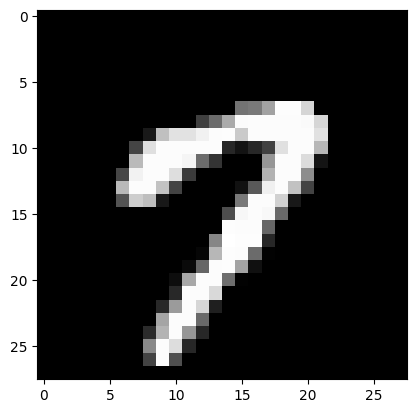

In [5]:
i = 15 #the image number you want to see

print("number = ", train[i][1])
plt.imshow(train[i][0].view(28, 28), cmap='gray')

In [6]:
class Network(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.Linear(7*7*32, out_features=128),
            nn.ReLU(),
            nn.Linear(128, 10, )
        )

    def forward(self, input):
        return self.model(input)

In [24]:

model = Network()

model.to('cuda')

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
device='cuda'
import time

for epoch in range(5):
    
    start = time.time()
    total_training_loss = 0
    total_training_samples = 0
    total_training_correct_classfied = 0

    for iteration, (features, labels) in enumerate(train_loader):
        features = features.to(device)
        labels = labels.to(device)

        output = model(features)
        
        loss_value = criterion(output, labels)

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        torch.Tensor()
        total_training_loss += loss_value.item()*labels.shape[0]
        total_training_samples += labels.shape[0]
        _, predicted = torch.max(output, dim=1)
        total_training_correct_classfied += (labels == predicted).sum().item()


        
        if ((iteration)%200==0):

            x_test, y_test = next(iter(test_loader))
            x_test = x_test.to(device)
            y_test = y_test.to(device)

            with torch.no_grad():
                test_output = model(x_test)

                test_loss_value = criterion(test_output, y_test)

                _, predicted = torch.max(test_output, dim=1)
                accuracy = (predicted==y_test).type(torch.float32).mean().item()
                

                print(f"Epoch: {epoch+1}, iteration: {iteration+1}, test accuracy: {accuracy}, test loss: {test_loss_value}")

        
    print(f"epoch: {epoch+1}, iteration: {iteration+1}, train loss: {total_training_loss/total_training_samples}, train accuracy: {total_training_correct_classfied/total_training_samples}, time taken: {time.time()-start}")

    



Epoch: 1, iteration: 1, test accuracy: 0.09799999743700027, test loss: 2.3027803897857666
Epoch: 1, iteration: 101, test accuracy: 0.9286999702453613, test loss: 0.25182458758354187
Epoch: 1, iteration: 201, test accuracy: 0.9493999481201172, test loss: 0.16792696714401245
Epoch: 1, iteration: 301, test accuracy: 0.9702000021934509, test loss: 0.08921226859092712
Epoch: 1, iteration: 401, test accuracy: 0.9767999649047852, test loss: 0.07458359748125076
epoch: 1, iteration: 469, train loss: 0.27610322682857513, train accuracy: 0.9121166666666667, time taken: 11.518822193145752
Epoch: 2, iteration: 1, test accuracy: 0.9807999730110168, test loss: 0.0615449883043766
Epoch: 2, iteration: 101, test accuracy: 0.9812999963760376, test loss: 0.056011516600847244
Epoch: 2, iteration: 201, test accuracy: 0.9828999638557434, test loss: 0.052740130573511124


KeyboardInterrupt: 

In [9]:
x_test, y_test = next(iter(test_loader))
x_test = x_test.to(device)
y_test = y_test.to(device)
with torch.no_grad():
    test_output = model(x_test)
    test_loss_value = criterion(test_output, y_test)
    _, predicted = torch.max(test_output, dim=1)
    accuracy = (predicted==y_test).type(torch.float32).mean().item()
        
print(f"test accuracy: {accuracy}, test loss: {test_loss_value}")


test accuracy: 0.9881999492645264, test loss: 0.03275950998067856


In [10]:
wrongly_classfied = x_test[predicted!=y_test]
wrongly_classfied_labels = y_test[predicted!=y_test]
wrongly_classfied_predited = predicted[predicted!=y_test]

In [11]:
wrongly_classfied_predited.shape

torch.Size([118])

true=  tensor(0) . predicted = 1


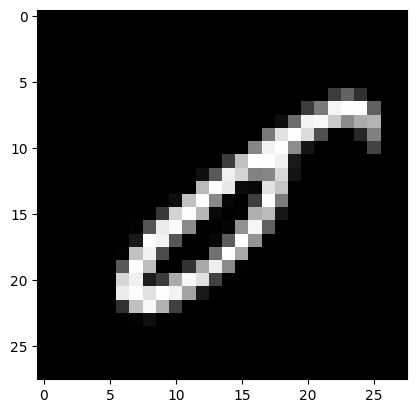

In [57]:
i = 96 #the image number you want to see

features= wrongly_classfied[i][0]
true_number = wrongly_classfied_labels[i]
predicted_number = wrongly_classfied_predited[i]


print("true= ", true_number.to('cpu'), f". predicted = {predicted_number}")
plt.imshow(features.to('cpu'), cmap='gray')

In [21]:
print_test_details(model, loss=criterion)

Test Score - Loss: 0.03275950998067856, top-1 accuracy: 0.9882, top-5 accuracy: 1.0


(0.03275950998067856, np.float64(0.9882), np.float64(1.0))